<a href="https://colab.research.google.com/github/Lamia-BenHassen/project-2/blob/main/PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA : https://drive.google.com/file/d/1GAvUtAcHFDXfZst9ahUwXipKK373V_Cl/view?usp=sharing

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(transform_output='pandas')


In [3]:
df=pd.read_csv('/content/drive/MyDrive/datainfo/Car_Insurance_Claim.csv')
df=df.set_index('ID')
df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,,,,,,,,,,,,,,,,,,
569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
df.shape

(10000, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 569520 to 442696
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non

# **Prepare/clean the data**

In [6]:
#check for duplicates
df.duplicated().sum()

12

In [7]:
df=df.drop(columns=['RACE'])

In [8]:
df[['POSTAL_CODE','MARRIED','CHILDREN','OUTCOME']]=df[['POSTAL_CODE','MARRIED','CHILDREN','OUTCOME']].astype(object)

In [9]:
df.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,9018.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000
mean,0.515813,0.697000,11697.003207,1.482900,0.23920,1.056300
std,0.137688,0.459578,2818.434528,2.241966,0.55499,1.652454
min,0.053358,0.000000,2000.000000,0.000000,0.00000,0.000000
25%,0.417191,0.000000,10000.000000,0.000000,0.00000,0.000000
50%,0.525033,1.000000,12000.000000,0.000000,0.00000,0.000000
75%,0.618312,1.000000,14000.000000,2.000000,0.00000,2.000000
max,0.960819,1.000000,22000.000000,22.000000,6.00000,15.000000


In [10]:
df.isna().sum()

AGE                      0
GENDER                   0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [11]:
rows_with_null = df[df['CREDIT_SCORE'].isnull()]
rows_with_null.isna().sum()

AGE                      0
GENDER                   0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE          88
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

we gonna drop all rows with null values the 982 rows  containing null values in CREDIT_SCORE are containing at the same time 88 null values in ANNUAL_MILEAGE.


In [12]:
df=df.drop(df[df['CREDIT_SCORE'].isnull()].index)
df=df.drop(df[df['ANNUAL_MILEAGE'].isnull()].index)
df.isna().sum()

AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [13]:
def explore_categorical(df, x, fillna = True,
                        figsize = (6,4)):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100

  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

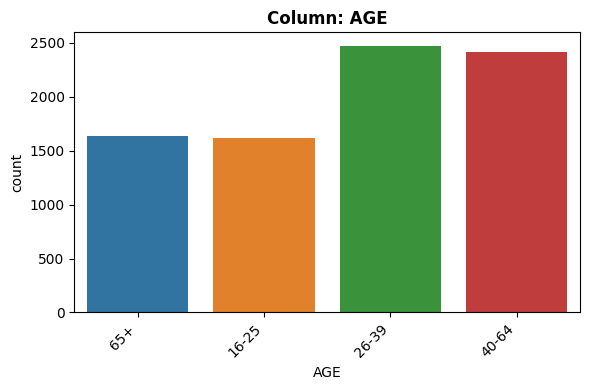

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: '26-39' occurs 2475 times (30.37%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: AGE'}, xlabel='AGE', ylabel='count'>)

In [14]:
explore_categorical(df, 'AGE')

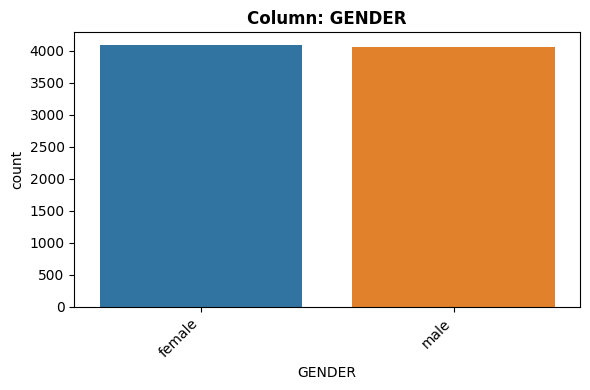

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'female' occurs 4084 times (50.12%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: GENDER'}, xlabel='GENDER', ylabel='count'>)

In [15]:
explore_categorical(df,'GENDER')

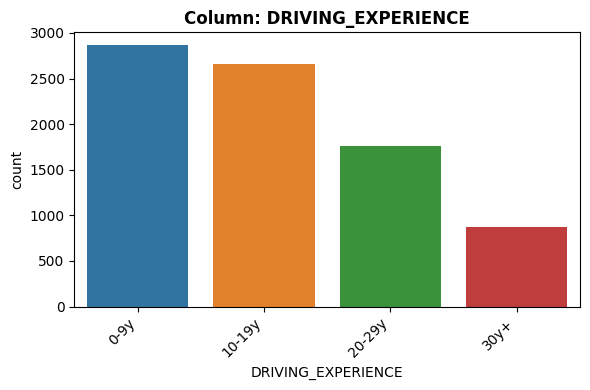

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: '0-9y' occurs 2864 times (35.15%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: DRIVING_EXPERIENCE'}, xlabel='DRIVING_EXPERIENCE', ylabel='count'>)

In [16]:
explore_categorical(df,'DRIVING_EXPERIENCE')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8149 entries, 569520 to 442696
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  8149 non-null   object 
 1   GENDER               8149 non-null   object 
 2   DRIVING_EXPERIENCE   8149 non-null   object 
 3   EDUCATION            8149 non-null   object 
 4   INCOME               8149 non-null   object 
 5   CREDIT_SCORE         8149 non-null   float64
 6   VEHICLE_OWNERSHIP    8149 non-null   float64
 7   VEHICLE_YEAR         8149 non-null   object 
 8   MARRIED              8149 non-null   object 
 9   CHILDREN             8149 non-null   object 
 10  POSTAL_CODE          8149 non-null   object 
 11  ANNUAL_MILEAGE       8149 non-null   float64
 12  VEHICLE_TYPE         8149 non-null   object 
 13  SPEEDING_VIOLATIONS  8149 non-null   int64  
 14  DUIS                 8149 non-null   int64  
 15  PAST_ACCIDENTS       8149 non-n

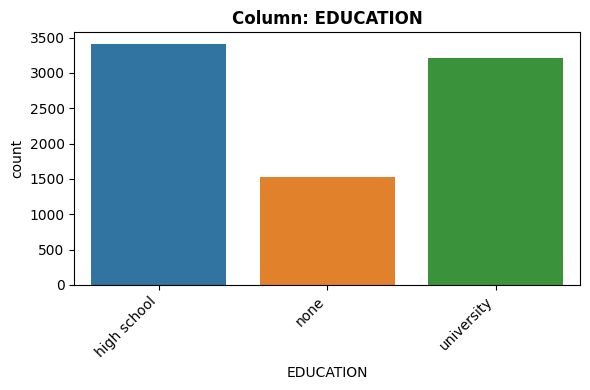

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'high school' occurs 3404 times (41.77%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: EDUCATION'}, xlabel='EDUCATION', ylabel='count'>)

In [18]:
explore_categorical(df,'EDUCATION')

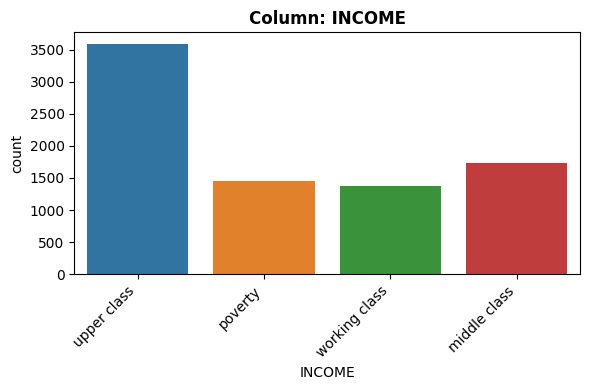

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'upper class' occurs 3588 times (44.03%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: INCOME'}, xlabel='INCOME', ylabel='count'>)

In [19]:
explore_categorical(df,'INCOME')

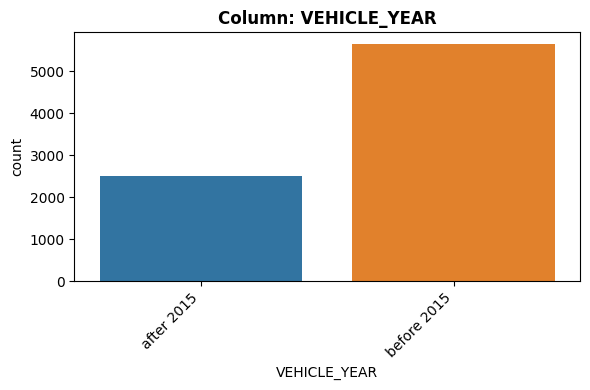

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'before 2015' occurs 5642 times (69.24%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: VEHICLE_YEAR'}, xlabel='VEHICLE_YEAR', ylabel='count'>)

In [20]:
explore_categorical(df,'VEHICLE_YEAR')

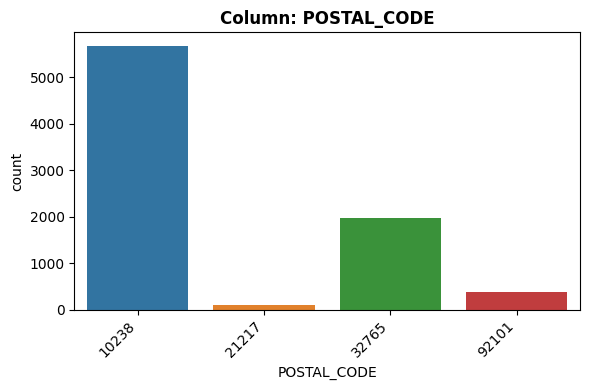

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: '10238' occurs 5684 times (69.75%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: POSTAL_CODE'}, xlabel='POSTAL_CODE', ylabel='count'>)

In [21]:
explore_categorical(df,'POSTAL_CODE')

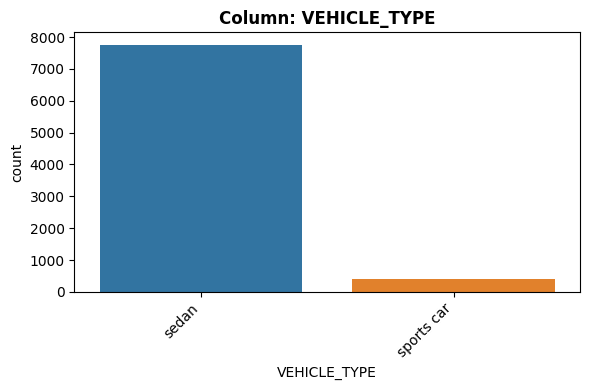

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'sedan' occurs 7761 times (95.24%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: VEHICLE_TYPE'}, xlabel='VEHICLE_TYPE', ylabel='count'>)

In [22]:
explore_categorical(df,'VEHICLE_TYPE')

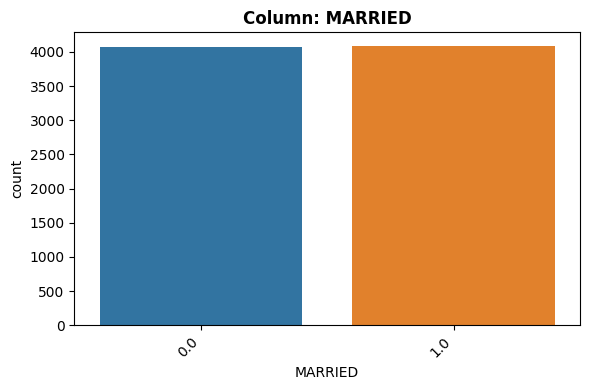

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '1.0' occurs 4083 times (50.1%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: MARRIED'}, xlabel='MARRIED', ylabel='count'>)

In [23]:
explore_categorical(df,'MARRIED')

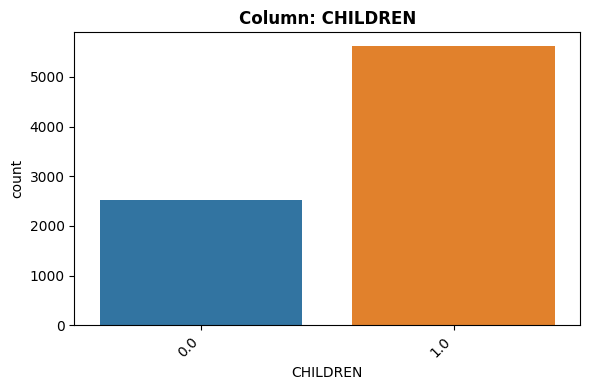

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '1.0' occurs 5617 times (68.93%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: CHILDREN'}, xlabel='CHILDREN', ylabel='count'>)

In [24]:
explore_categorical(df,'CHILDREN')

# **The Target **

The outcome column indicates 1 if a customer has claimed his/her loan else 0.



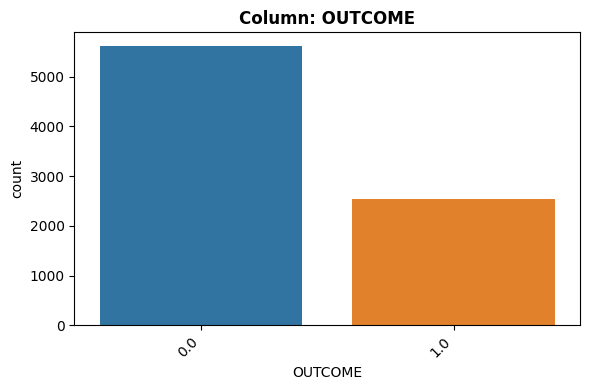

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0.0' occurs 5613 times (68.88%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: OUTCOME'}, xlabel='OUTCOME', ylabel='count'>)

In [25]:
explore_categorical(df,'OUTCOME')

In [26]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()

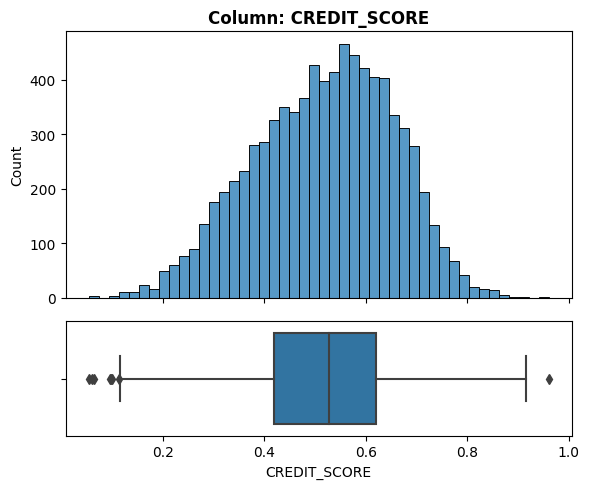

In [27]:
explore_numeric(df, "CREDIT_SCORE")

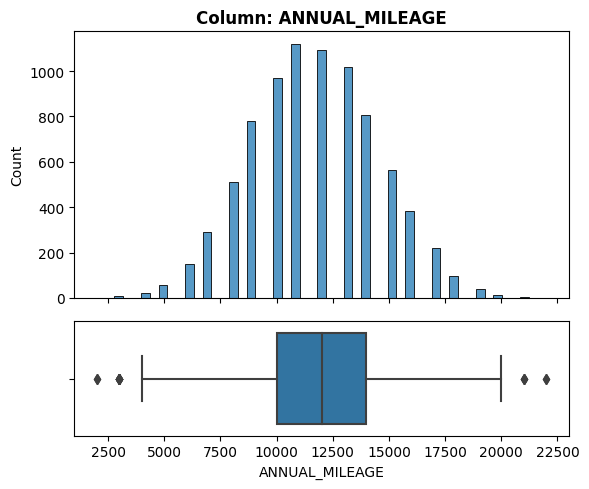

In [28]:
explore_numeric(df, "ANNUAL_MILEAGE")

Text(0.5, 1.0, 'Column: DUIS ')

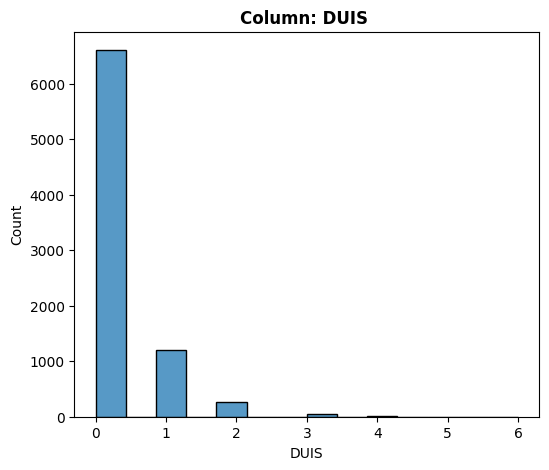

In [29]:
fig, ax= plt.subplots(figsize=(6,5))
sns.histplot(data=df, x='DUIS')
ax.set_title(f"Column: DUIS ", fontweight='bold')

Text(0.5, 1.0, 'Column: PAST_ACCIDENTS ')

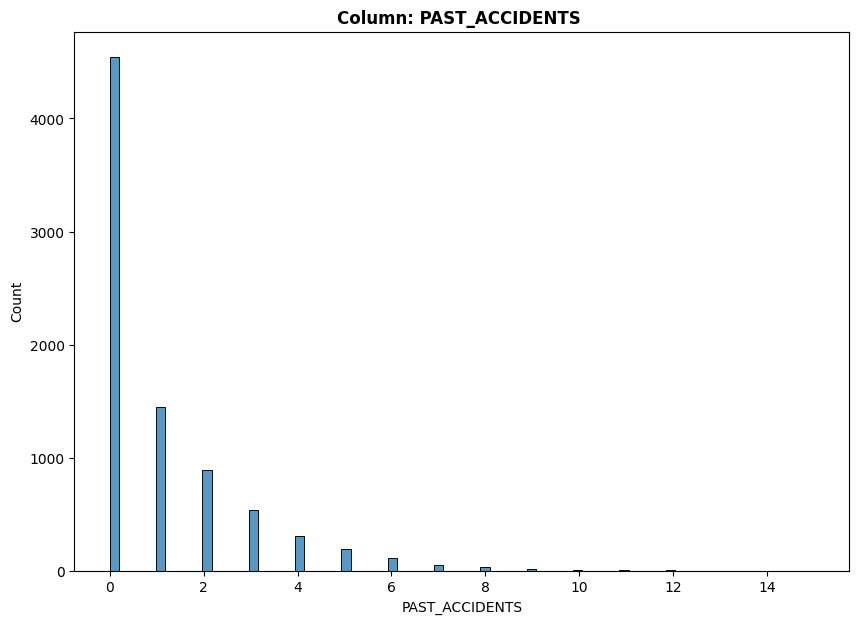

In [30]:
fig, ax= plt.subplots(figsize=(10,7))
sns.histplot(data=df, x='PAST_ACCIDENTS')
ax.set_title(f"Column: PAST_ACCIDENTS ", fontweight='bold')

Text(0.5, 1.0, 'Column:SPEEDING_VIOLATIONS ')

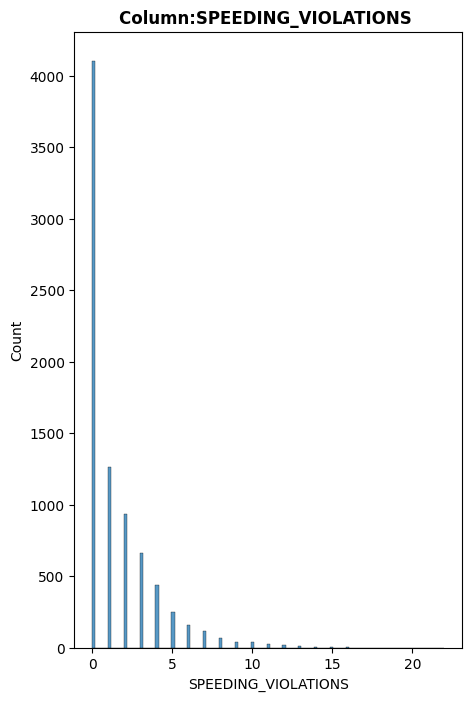

In [31]:
fig, ax= plt.subplots(figsize=(5,8))
sns.histplot(data=df, x='SPEEDING_VIOLATIONS')
ax.set_title(f"Column:SPEEDING_VIOLATIONS ", fontweight='bold')

Identifying any moderate or strong correlations

In [32]:
correlation=df.corr()

<ipython-input-32-0c9b4bd1cb53>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


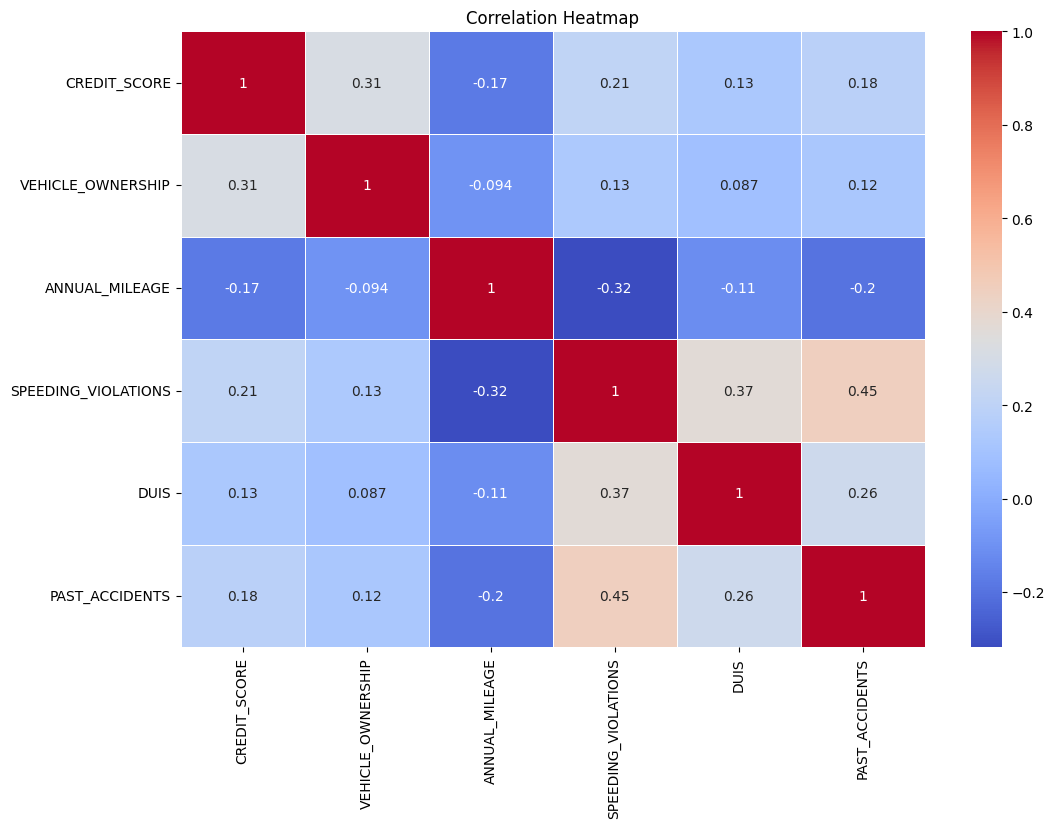

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [44]:
df['POSTAL_CODE'].value_counts()

10238    5684
32765    1976
92101     387
21217     102
Name: POSTAL_CODE, dtype: int64

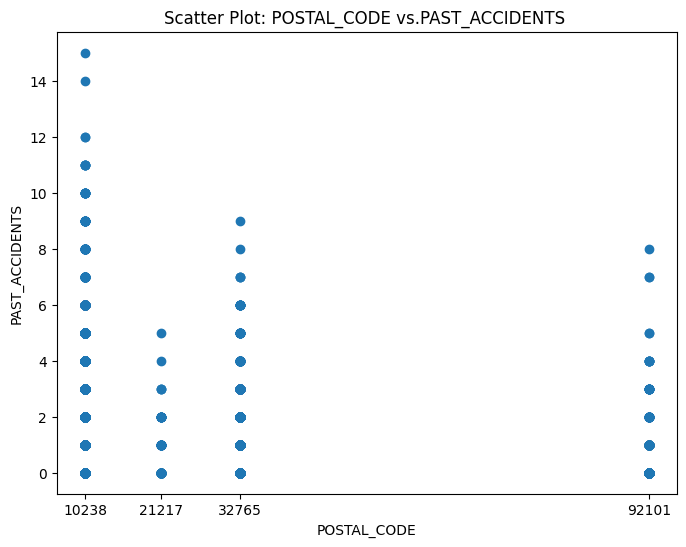

In [47]:
plt.figure(figsize=(8, 6))
x_values=[10238,21217,32765,92101]
plt.scatter(df['POSTAL_CODE'], df['PAST_ACCIDENTS'])
plt.xlabel('POSTAL_CODE')
plt.ylabel('PAST_ACCIDENTS')
plt.title('Scatter Plot: POSTAL_CODE vs.PAST_ACCIDENTS ')
plt.xticks(x_values, x_values)
plt.show()

The postal code 10238 has a significant historical association with a high incidence of past accidents, contributing to an elevated level of risk

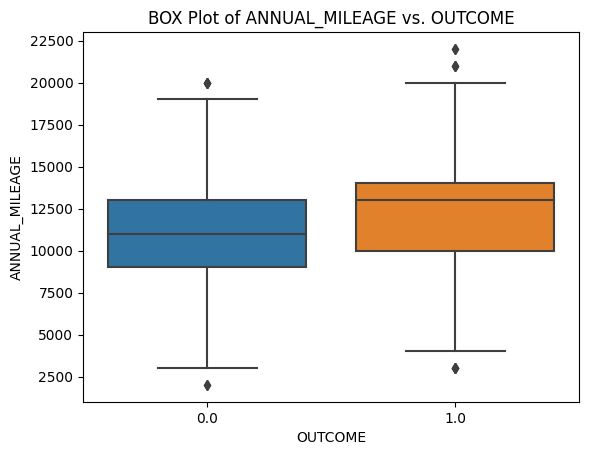

In [40]:
sns.boxplot(x='OUTCOME', y='ANNUAL_MILEAGE', data=df)
plt.title("BOX Plot of ANNUAL_MILEAGE vs. OUTCOME")
plt.show()

Customers with vehicles that accumulate a high annual mileage are statistically more likely to file a loan claim

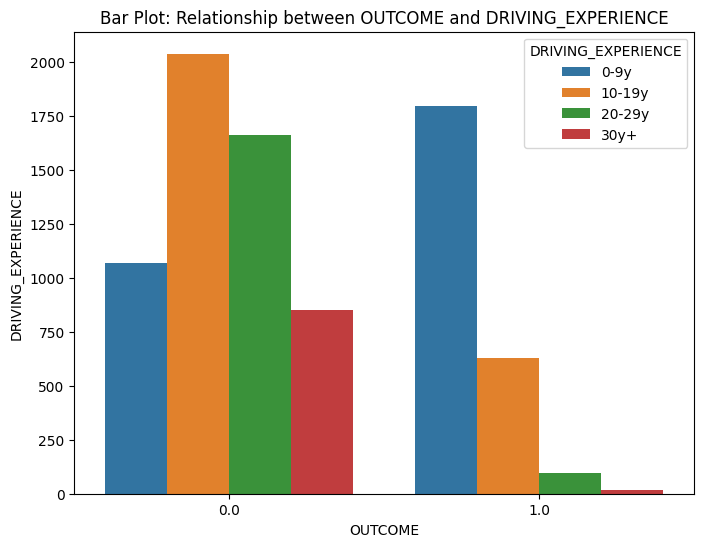

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='OUTCOME', hue='DRIVING_EXPERIENCE')
plt.xlabel('OUTCOME')
plt.ylabel('DRIVING_EXPERIENCE')
plt.title('Bar Plot: Relationship between OUTCOME and DRIVING_EXPERIENCE')
plt.show()

Customers with less than 10 years of experience are statistically more prone to submit loan claims. As the number of years of experience increases, the associated risk decreases.